In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sn

# Leitura dos resultados

In [16]:
def ler_resultados(tipo, list_gra, iterations, methods):
    results_df = pd.DataFrame(columns = ['Method','Granularity',
                                         'True_Positive_Rate_Mean', 'True_Positive_Rate_Std',
                                         'False_Positive_Rate_Mean', 'False_Positive_Rate_Std',
                                         'True_Positive_Mean', 'True_Positive_Std',
                                         'True_Negative_Mean', 'True_Negative_Std',
                                         'False_Positive_Mean', 'False_Positive_Std',
                                         'False_Negative_Mean', 'False_Negative_Std',
                                         'N_Groups_Mean', 'N_Groups_Std'])

    for i in list_gra:
        df = pd.DataFrame(columns = ['Method',
                                     'Granularity',
                                    'True_Positive',
                                    'True_Negative',
                                    'False_Positive',
                                    'False_Negative',
                                    'N_Groups',
                                    'Execution_Time'])

        for j in range(iterations):
            df_aux = pd.read_csv("results/{}_detection_info_{}_{}.csv".format(tipo,i,j))


            df_aux["Execution_Time"] = df_aux["Time_Elapsed"]

            tp = df_aux['True_Positive']
            tn = df_aux['True_Negative']
            fp = df_aux['False_Positive']
            fn = df_aux['False_Negative']
            
            tpr = tp / (tp + fn)
            fpr = fp / (fp + tn)

            df_aux["True_Positive_Rate"] = tpr*100
            df_aux["False_Positive_Rate"] = fpr*100

            df = pd.concat([df, df_aux])

        df = df.dropna()
        df = df.reset_index()
        df = df.drop('index',1)
        
        
        group_mean = df.groupby('Method').mean()
        group_std = df.groupby('Method').std()
        for m in methods:
            if tipo == 'First_ADP':
                results_dict = {'Method':m,
                                'Granularity':i,
                                'True_Positive_Rate_Mean': group_mean.loc[m,'True_Positive_Rate'],
                                'True_Positive_Rate_Std': group_std.loc[m,'True_Positive_Rate'],
                                'False_Positive_Rate_Mean': group_mean.loc[m,'False_Positive_Rate'],
                                'False_Positive_Rate_Std': group_std.loc[m,'False_Positive_Rate'],
                                'True_Positive_Mean': group_mean.loc[m,'True_Positive'], 
                                'True_Positive_Std': group_std.loc[m,'True_Positive'],
                                'True_Negative_Mean': group_mean.loc[m,'True_Negative'], 
                                'True_Negative_Std': group_std.loc[m,'True_Negative'],
                                'False_Positive_Mean': group_mean.loc[m,'False_Positive'], 
                                'False_Positive_Std': group_std.loc[m,'False_Positive'],
                                'False_Negative_Mean': group_mean.loc[m,'False_Negative'], 
                                'False_Negative_Std': group_std.loc[m,'False_Negative'],
                                'N_Groups_Mean': group_mean.loc[m,'N_Groups'], 
                                'N_Groups_Std': group_std.loc[m,'N_Groups'],
                                'True_Positive_Evolution': abs(group_mean.loc[m,'True_Positive_Rate'] - group_mean.loc['Old','True_Positive_Rate']),
                                'False_Positive_Evolution': abs(group_mean.loc[m,'False_Positive_Rate'] - group_mean.loc['Old','False_Positive_Rate'])}
            else:
                results_dict = {'Method':m,
                                'Granularity':i,
                                'True_Positive_Rate_Mean': group_mean.loc[m,'True_Positive_Rate'],
                                'True_Positive_Rate_Std': group_std.loc[m,'True_Positive_Rate'],
                                'False_Positive_Rate_Mean': group_mean.loc[m,'False_Positive_Rate'],
                                'False_Positive_Rate_Std': group_std.loc[m,'False_Positive_Rate'],
                                'True_Positive_Mean': group_mean.loc[m,'True_Positive'], 
                                'True_Positive_Std': group_std.loc[m,'True_Positive'],
                                'True_Negative_Mean': group_mean.loc[m,'True_Negative'], 
                                'True_Negative_Std': group_std.loc[m,'True_Negative'],
                                'False_Positive_Mean': group_mean.loc[m,'False_Positive'], 
                                'False_Positive_Std': group_std.loc[m,'False_Positive'],
                                'False_Negative_Mean': group_mean.loc[m,'False_Negative'], 
                                'False_Negative_Std': group_std.loc[m,'False_Negative'],
                                'N_Groups_Mean': group_mean.loc[m,'N_Groups'], 
                                'N_Groups_Std': group_std.loc[m,'N_Groups']}
                
            results_df = results_df.append(results_dict, ignore_index=True)

    df = results_df
    df.to_csv('results/{}_results_df.csv'.format(tipo))
    return df

In [23]:
tipo = 'Third_ADP' # 'First_ADP', 'Second_ADP'

if tipo == 'First_ADP':
    methods = ['Old', 'IsolationForest', 'SVM-rbf', 'LOF', 'EllipticEnvelope']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
else:
    methods = ['IsolationForest', 'SVM-rbf', 'LOF', 'EllipticEnvelope']
    colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    
    
list_gra = [i for i in range(1,11)]
x = np.array(list_gra)

iterations = 15
df = ler_resultados(tipo,list_gra, iterations, methods)

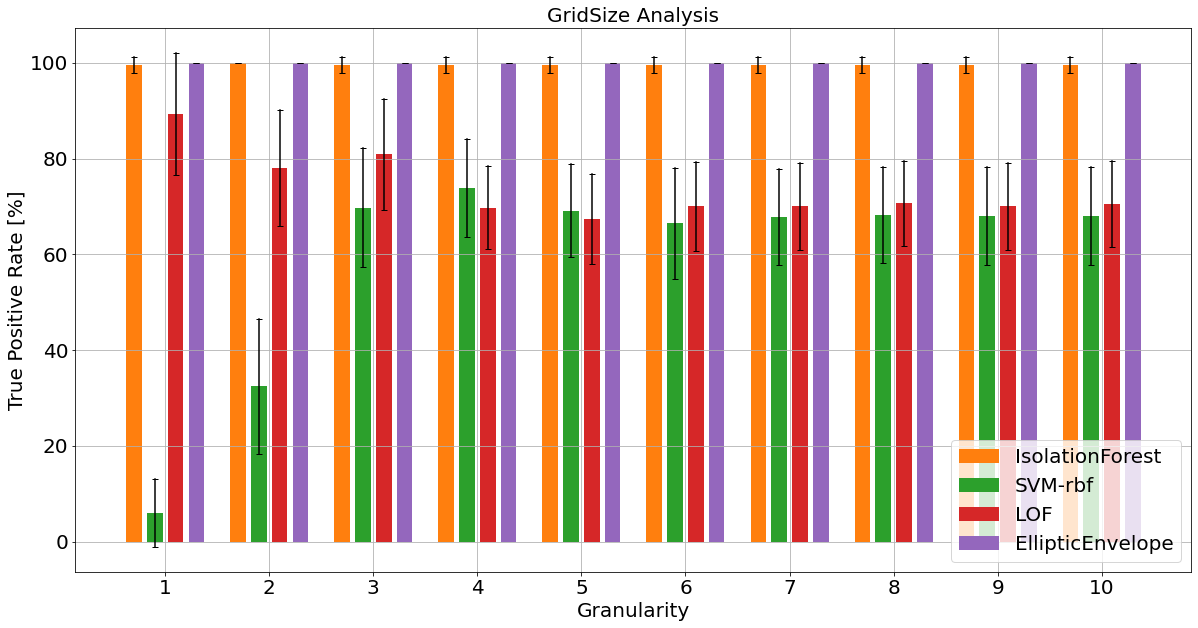

In [24]:
plt.figure(figsize=(20,10))
ax = plt.subplot()

space = np.linspace(-.3,.3, len(methods))
width = .6/len(methods)
for i in range(len(methods)):
    ax.bar(x+space[i], df[df['Method']==methods[i]]['True_Positive_Rate_Mean'], width=width, color=colors[i], align='center')
    
plt.legend(methods, fontsize=20, loc=4)    

for i in range(len(methods)):
    plt.plot([x+space[i], x+space[i]], [df[df['Method']==methods[i]]['True_Positive_Rate_Mean'] - df[df['Method']==methods[i]]['True_Positive_Rate_Std'],
                            df[df['Method']==methods[i]]['True_Positive_Rate_Mean'] + df[df['Method']==methods[i]]['True_Positive_Rate_Std']], 'k_-')


ax.set_xticks(x)
ax.set_title('GridSize Analysis', fontsize=20)
ax.set_ylabel('True Positive Rate [%]', fontsize=20)
ax.set_xlabel('Granularity', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.grid()

plt.savefig('results/True_Positive_Rate.png', bbox_inches='tight')
plt.show()

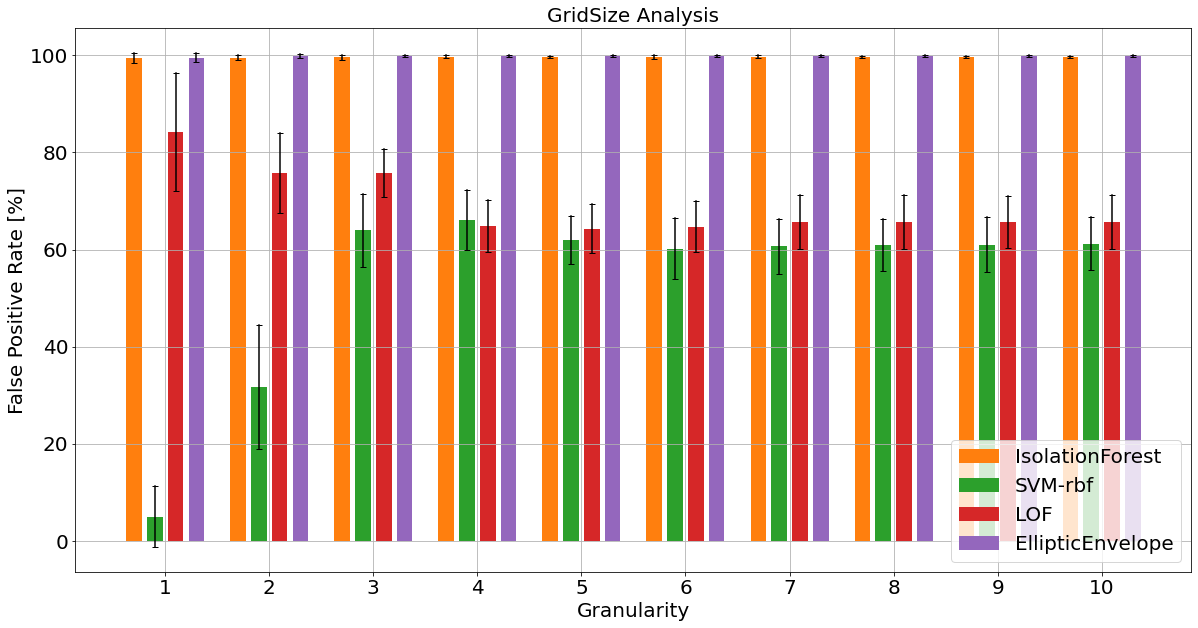

In [25]:
plt.figure(figsize=(20,10))
ax = plt.subplot()

space = np.linspace(-.3,.3, len(methods))
width = .6/len(methods)
for i in range(len(methods)):
    ax.bar(x+space[i], df[df['Method']==methods[i]]['False_Positive_Rate_Mean'], width=width, color=colors[i], align='center')
    
plt.legend(methods, fontsize=20, loc=4)    

for i in range(len(methods)):
    plt.plot([x+space[i], x+space[i]], [df[df['Method']==methods[i]]['False_Positive_Rate_Mean'] - df[df['Method']==methods[i]]['False_Positive_Rate_Std'],
                            df[df['Method']==methods[i]]['False_Positive_Rate_Mean'] + df[df['Method']==methods[i]]['False_Positive_Rate_Std']], 'k_-')

ax.set_xticks(x)
ax.set_title('GridSize Analysis', fontsize=20)
ax.set_ylabel('False Positive Rate [%]', fontsize=20)
ax.set_xlabel('Granularity', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.grid()

plt.savefig('results/False_Positive_Rate.png', bbox_inches='tight')
plt.show()

# Comparação
Somente para "First_ADP"

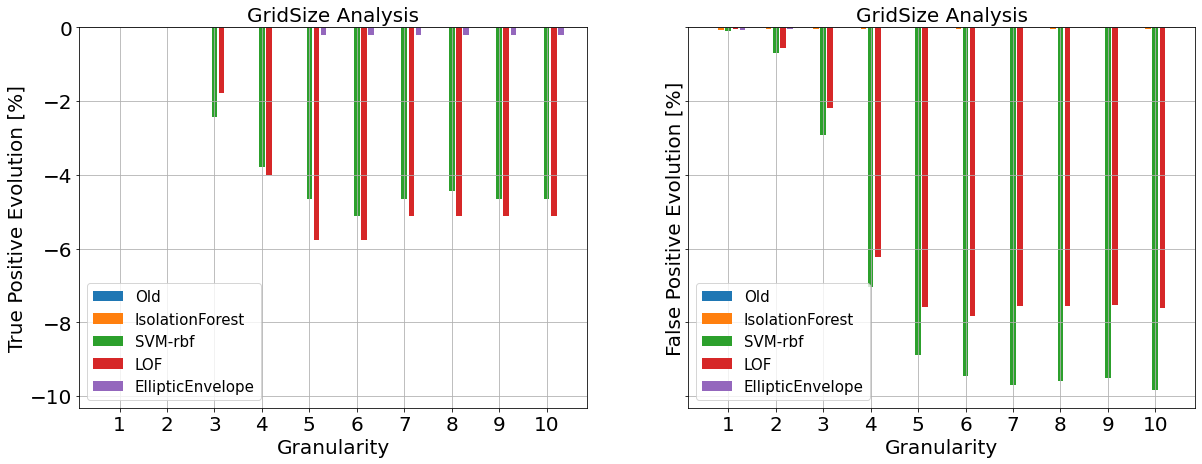

In [7]:
fig, ax = plt.subplots(1,2,figsize=(20,7),sharey=True)

space = np.linspace(-.3,.3, len(methods))
width = .6/len(methods)
for i in range(len(methods)):
    ax[0].bar(x+space[i], -df[df['Method']==methods[i]]['True_Positive_Evolution'], width=width, color=colors[i], align='center')

ax[0].legend(methods, fontsize=15, loc=3)
ax[0].set_xticks(x)
ax[0].set_title('GridSize Analysis', fontsize=20)
ax[0].set_ylabel('True Positive Evolution [%]', fontsize=20)
ax[0].set_xlabel('Granularity', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].grid()

space = np.linspace(-.3,.3, len(methods))
width = .6/len(methods)
for i in range(len(methods)):
    ax[1].bar(x+space[i], -df[df['Method']==methods[i]]['False_Positive_Evolution'], width=width, color=colors[i], align='center')

plt.legend(methods, fontsize=15, loc=3)

ax[1].set_xticks(x)
ax[1].set_title('GridSize Analysis', fontsize=20)
ax[1].set_ylabel('False Positive Evolution [%]', fontsize=20)
ax[1].set_xlabel('Granularity', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

plt.grid()

plt.savefig('results/Rates_Evolution.png', bbox_inches='tight')
plt.show()